## **2Ï°∞ ÎØ∏Îãà ÌîÑÎ°úÏ†ùÌä∏3**

## 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

- ÌîÑÎ°úÏ†ùÌä∏Ïóê ÏÇ¨Ïö©Ìï† ÎùºÏù¥Î∏åÎü¨Î¶¨ Í∞ÄÏ†∏Ïò§Í∏∞
- matplotlib ÌïúÍ∏Ä Íπ®ÏßêÎ∞©ÏßÄÎ•º ÏúÑÌïú ÏΩîÎìú Ïã§ÌñâÌïòÍ∏∞

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings(action='ignore')

ÌîÑÎ°úÏ†ùÌä∏Ïóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks//movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv')

## 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

**Îç∞Ïù¥ÌÑ∞ÏÖã(Dataset)Ïùò ÎÇ¥Ïö©**

1. movies_train.csv / movies_test.csvÏùò ÏπºÎüº ÎÇ¥Ïö©
- title : ÏòÅÌôîÏùò Ï†úÎ™©
- distributer : Î∞∞Í∏âÏÇ¨
- genre : Ïû•Î•¥
- release_time : Í∞úÎ¥âÏùº
- time : ÏÉÅÏòÅÏãúÍ∞Ñ(Î∂Ñ)
- screening_rat : ÏÉÅÏòÅÎì±Í∏â
- director : Í∞êÎèÖ Ïù¥Î¶Ñ
- dir_prev_bfnum : Ìï¥Îãπ Í∞êÎèÖÏù¥ Ïù¥ ÏòÅÌôîÎ•º ÎßåÎì§Í∏∞ Ï†Ñ Ï†úÏûëÏóê Ï∞∏Ïó¨Ìïú ÏòÅÌôîÏóêÏÑúÏùò ÌèâÍ∑† Í¥ÄÍ∞ù Ïàò (Îã® Í¥ÄÍ∞ùÏàòÍ∞Ä ÏïåÎ†§ÏßÄÏßÄ ÏïäÏùÄ ÏòÅÌôî Ï†úÏô∏)
- dir_prev_num : Ìï¥Îãπ Í∞êÎèÖÏù¥ Ïù¥ ÏòÅÌôîÎ•º ÎßåÎì§Í∏∞ Ï†Ñ Ï†úÏûëÏóê Ï∞∏Ïó¨Ìïú ÏòÅÌôîÏùò Í∞úÏàò (Îã® Í¥ÄÍ∞ùÏàòÍ∞Ä ÏïåÎ†§ÏßÄÏßÄ ÏïäÏùÄ ÏòÅÌôî Ï†úÏô∏)
- num_staff : Ïä§ÌÖù Ïàò
- num_actor : Ï£ºÏó∞ Î∞∞Ïö∞ Ïàò
- box_off_num : Í¥ÄÍ∞ù Ïàò

2. submission.csv Îç∞Ïù¥ÌÑ∞ ÏÉÅÏÑ∏ ÏÑ§Î™Ö
- 2010ÎÖÑÎåÄ ÌïúÍµ≠ÏóêÏÑú Í∞úÎ¥âÌïú ÌïúÍµ≠ÏòÅÌôî 600Í∞úÏóê ÎåÄÌïú Í∞êÎèÖ, Ïù¥Î¶Ñ, ÏÉÅÏòÅÎì±Í∏â, Í¥ÄÍ∞ùÏàò Îì±Ïùò Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥ Îç∞Ïù¥ÌÑ∞

**Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖã ÌôïÏù∏**

In [5]:
train.head()

title   distributor genre release_time  time screening_rat director  \
0     Í∞úÎì§Ïùò Ï†ÑÏüÅ      Î°ØÎç∞ÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏    Ïï°ÏÖò   2012-11-22    96      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      Ï°∞Î≥ëÏò•   
1       ÎÇ¥Î∂ÄÏûêÎì§        (Ï£º)ÏáºÎ∞ïÏä§   ÎäêÏôÄÎ•¥   2015-11-19   130      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      Ïö∞ÎØºÌò∏   
2  ÏùÄÎ∞ÄÌïòÍ≤å ÏúÑÎåÄÌïòÍ≤å        (Ï£º)ÏáºÎ∞ïÏä§    Ïï°ÏÖò   2013-06-05   123       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ïû•Ï≤†Ïàò   
3   ÎÇòÎäî Í≥µÎ¨¥ÏõêÏù¥Îã§        (Ï£º)NEW   ÏΩîÎØ∏Îîî   2012-07-12   101        Ï†ÑÏ≤¥ Í¥ÄÎûåÍ∞Ä      Íµ¨ÏûêÌôç   
4       Î∂àÎüâÎÇ®ÎÖÄ  ÏáºÎ∞ïÏä§(Ï£º)ÎØ∏ÎîîÏñ¥ÌîåÎ†âÏä§   ÏΩîÎØ∏Îîî   2010-11-04   108       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ïã†Í∑ºÌò∏   

   dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  
0             NaN             0         91          2        23398  
1      1161602.50             2        387          3      7072501  
2       220775.25             4        343          4      6959083  
3        23894.00             2         20          6       217866  
4            1.00             1        251          2       483387

In [6]:
test.head()

title distributor   genre release_time  time screening_rat director  \
0       Ïö©ÏÑúÎäî ÏóÜÎã§      ÏãúÎÑ§ÎßàÏÑúÎπÑÏä§     ÎäêÏôÄÎ•¥   2010-01-07   125      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä      ÍπÄÌòïÏ§Ä   
1  ÏïÑÎπ†Í∞Ä Ïó¨ÏûêÎ•º Ï¢ãÏïÑÌï¥      (Ï£º)ÏáºÎ∞ïÏä§  Î©úÎ°ú/Î°úÎß®Ïä§   2010-01-14   113       12ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Ïù¥Í¥ëÏû¨   
2          ÌïòÎ™®Îãà   CJ ÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏     ÎìúÎùºÎßà   2010-01-28   115       12ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Í∞ïÎåÄÍ∑ú   
3          ÏùòÌòïÏ†ú      (Ï£º)ÏáºÎ∞ïÏä§      Ïï°ÏÖò   2010-02-04   116       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä       Ïû•Ìõà   
4        ÌèâÌñâ Ïù¥Î°†   CJ ÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏      Í≥µÌè¨   2010-02-18   110       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä      Í∂åÌò∏ÏòÅ   

   dir_prev_bfnum  dir_prev_num  num_staff  num_actor  
0    3.005290e+05             2        304          3  
1    3.427002e+05             4        275          3  
2    4.206611e+06             3        419          7  
3    6.913420e+05             2        408          2  
4    3.173800e+04             1        380          1

In [7]:
submission.head()

title  box_off_num
0       Ïö©ÏÑúÎäî ÏóÜÎã§            0
1  ÏïÑÎπ†Í∞Ä Ïó¨ÏûêÎ•º Ï¢ãÏïÑÌï¥            0
2          ÌïòÎ™®Îãà            0
3          ÏùòÌòïÏ†ú            0
4        ÌèâÌñâ Ïù¥Î°†            0

**Í∞Å Îç∞Ïù¥ÌÑ∞ ÏöîÏïΩ Î∞è ÏöîÏïΩ ÌÜµÍ≥ÑÎüâ ÌôïÏù∏**

1. shape ( ) Ïù¥Ïö©

In [8]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


- trainÏùò Í≤ΩÏö∞, 600Í∞úÏùò ÌñâÍ≥º 12Í∞úÏùò columnsÎ°ú Ïù¥Î£®Ïñ¥Ïßê
- testÏùò Í≤ΩÏö∞, 243Í∞úÏùò ÌñâÍ≥º 11Í∞úÏùò columnsÎ°ú Ïù¥Î£®Ïñ¥Ïßê (box_off_num Ï†úÏô∏)
- submissionÏùò Í≤ΩÏö∞, 243Í∞úÏùò ÌñâÍ≥º 2Í∞úÏùò columnsÎ°ú Ïù¥Î£®Ïñ¥Ïßê

  -> Ï¶â, 600Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏãúÏºú 243Í∞úÏùò Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ ÏßÑÌñâ

2. info ( ) Ïù¥Ïö©

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


trainÍ≥º test Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ info( )Î°ú Ï†ÑÎ∞òÏ†ÅÏù∏ Íµ¨Ï°∞Î•º ÌôïÏù∏ÌïòÏó¨ Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï†ÑÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÌïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏùå.
1. dir_prev_bfnumÏóêÏÑúÎßå Non-NullÏùò ÏàòÍ∞Ä Ï†ÅÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ **Í≤∞Ï∏°ÏπòÍ∞Ä ÌôïÏù∏**ÎêòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏùå

    -> dir_prev_dfnumÏùÄ **Í¥ÄÍ∞ùÏàò** Ïù¥ÎØÄÎ°ú Í≤∞Ï∏°Í∞íÏùò ÌòïÌÉúÎ•º ÌôïÏù∏ÌïòÍ≥†, intÌòïÏù¥ ÏïÑÎãàÎùºÎ©¥ intÌòïÏù∏ 0ÏúºÎ°ú Î∞îÍøîÏïºÌï®
2. release_timeÏùò Í≤ΩÏö∞ **ÎÇ†Ïßú / ÏãúÍ∞ÑÏóê Í¥ÄÎ†®Îêú Îç∞Ïù¥ÌÑ∞**Ïù∏Îç∞, ÌöåÍ∑ÄÎ™®Îç∏ÏùÄ datetime64 ÌòïÏãùÏùÑ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏùå

    ->  Í∞ÅÍ∞Å Ïó∞ÎèÑ, ÏõîÏùÑ Î∂ÑÎ¶¨ÌïòÏó¨ Ïà´ÏûêÌòï ÌîºÏ≤òÎ°ú Î≥ÄÌôò


**Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**

1-1. Í≤∞Ï∏°Ïπò ÌôïÏù∏

isna()Î•º Ïù¥Ïö©ÌïòÏó¨ Í≤∞Ï∏°ÏπòÏóê ÎåÄÌïú Í∞úÏàòÎ•º ÌôïÏù∏

In [11]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [12]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

train Îç∞Ïù¥ÌÑ∞ÏóêÎäî dir_prev_bfnumÏóê ÎåÄÌïòÏó¨ 330Í∞úÏùò Í≤∞Ï∏°Í∞íÏù¥, test Îç∞Ïù¥ÌÑ∞ÏóêÎäî 136Í∞úÏùò Í≤∞Ï∏°Í∞íÏù¥ Ï°¥Ïû¨

 -> Í≤∞Ï∏°Í∞íÏùò ÌòïÌÉú ÌôïÏù∏

In [13]:
train[train['dir_prev_bfnum'].isna()].head()

title      distributor   genre release_time  time screening_rat  \
0            Í∞úÎì§Ïùò Ï†ÑÏüÅ         Î°ØÎç∞ÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏      Ïï°ÏÖò   2012-11-22    96      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä   
6              Í∏∏ÏúÑÏóêÏÑú             Î∞±ÎëêÎåÄÍ∞Ñ   Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2013-05-23   104        Ï†ÑÏ≤¥ Í¥ÄÎûåÍ∞Ä   
8   1789, Î∞îÏä§Ìã∞Ïú†Ïùò Ïó∞Ïù∏Îì§  Ïú†ÎãàÎ≤ÑÏÑ§ÌîΩÏ≥êÏä§Ïù∏ÌÑ∞ÎÇ¥ÏÖîÎÑêÏΩîÎ¶¨ÏïÑ     ÎÆ§ÏßÄÏª¨   2014-09-18   129        Ï†ÑÏ≤¥ Í¥ÄÎûåÍ∞Ä   
9             Ï≤≠Ï∂òÍ∑∏Î£®Î∏å           (Ï£º)ÎëêÌÉÄÏó∞     ÎìúÎùºÎßà   2012-03-15    94       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä   
10           AV ÏïÑÏù¥Îèå        (Ï£º) ÏºÄÏù¥ÏïåÏî®ÏßÄ  Î©úÎ°ú/Î°úÎß®Ïä§   2015-07-27    89      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä   

   director  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  
0       Ï°∞Î≥ëÏò•             NaN             0         91          2        23398  
6       Ïù¥Ï∞ΩÏû¨             NaN             0         32          5        53526  
8       Ï†ïÏÑ±Î≥µ             NaN             0          3          5         4778  
9       Î≥ÄÏÑ±ÌòÑ             NaN             0        138          3          868  
10   Ï°∞Ï°∞ ÌûàÎç∞Ïò§             NaN             0          0          4          745

In [14]:
test[test['dir_prev_bfnum'].isna()].head()

title      distributor  genre release_time  time screening_rat  \
5       ÌöåÏò§Î¶¨ Î∞îÎûå             Î™®Ïø†ÏäàÎùº    ÎìúÎùºÎßà   2010-02-25    95       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä   
6       Í≤ΩÍ≥ÑÎèÑÏãú 2            ÏãúÎÑ§Îßà Îã¨  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2010-03-18   104       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä   
7       Ïù¥ÏõÉÏßë ÎÇ®Ïûê        (Ï£º)Î£®ÎØπÏä§ÎØ∏ÎîîÏñ¥    ÎìúÎùºÎßà   2010-03-18   100      Ï≤≠ÏÜåÎÖÑ Í¥ÄÎûåÎ∂àÍ∞Ä   
8  ÏïÑÎßàÏ°¥Ïùò ÎààÎ¨º Í∑πÏû•Ìåê           ÎßàÏö¥Ìã¥ÌîΩÏ≥êÏä§  Îã§ÌÅêÎ©òÌÑ∞Î¶¨   2010-03-25    88       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä   
9      Î∞òÍ∞ÄÏö¥ ÏÇ¥Ïù∏Ïûê  Î°ØÎç∞ÏáºÌïë(Ï£º)Î°ØÎç∞ÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏    ÏΩîÎØ∏Îîî   2010-04-08   107       15ÏÑ∏ Í¥ÄÎûåÍ∞Ä   

  director  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  
5      Ïû•Í±¥Ïû¨             NaN             0        156          2  
6      ÌôçÌòïÏàô             NaN             0         11          2  
7      Ïû•ÎèôÌôç             NaN             0        117          5  
8      ÍπÄÏßÑÎßå             NaN             0         76          1  
9      ÍπÄÎèôÏö±             NaN             0        255          3

1-2 Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

1. ÎÇ†Ïßú Î∂ÑÌï¥ --> release_timeÏùÑ year, monthÏúºÎ°ú Ï™ºÍ∞¨ (train. test Î™®Îëê Ï†ÅÏö©) -> ÏõêÌï´ Ïù∏ÏΩîÎî©
2. Î∞∞Í∏âÏÇ¨, Í∞êÎèÖ --> ÎπàÎèÑ Í≥ÑÏÇ∞ ÌõÑ ÌîºÏ≤ò Ï∂îÍ∞Ä Í∏∞Ï°¥ ÌîºÏ≤ò ÎìúÎûç
3. title, release_time,  dir_prev_bfnum ÎìúÎûç
4. genre, screening_rat --> ÏõêÌï´ Ïù∏ÏΩîÎî©
5. dir_prev_num, num_staff, num_actor, ÌÉÄÍ≤üÍ∞í --> Î°úÍ∑∏ Î≥ÄÌôò

In [15]:
import pandas as pd
import numpy as np

# 1. ÎÇ†Ïßú Î∂ÑÌï¥ (release_time ‚Üí year, month)
def decompose_date(df):
    df['release_time'] = pd.to_datetime(df['release_time'])
    df['year'] = df['release_time'].dt.year
    df['month'] = df['release_time'].dt.month
    return df

train = decompose_date(train)
test = decompose_date(test)

# 2. Î∞∞Í∏âÏÇ¨, Í∞êÎèÖ ‚Üí ÎπàÎèÑ Í∏∞Î∞ò ÌîºÏ≤ò Ï∂îÍ∞Ä
for col in ['distributor', 'director']:
    freq = train[col].value_counts()
    train[f'{col}_freq'] = train[col].map(freq)
    test[f'{col}_freq'] = test[col].map(freq).fillna(0)  # ÌÖåÏä§Ìä∏ÏÖãÏóî ÏóÜÎäî Í≤ΩÏö∞ 0 Ï≤òÎ¶¨

# 3. title, release_time, dir_prev_bfnum Ï†úÍ±∞
drop_cols = ['title', 'release_time', 'dir_prev_bfnum', 'distributor', 'director']
train.drop(columns=drop_cols, inplace=True)
test.drop(columns=drop_cols, inplace=True)

# 4. genre, screening_rat, year, month ‚Üí Ïõê-Ìï´ Ïù∏ÏΩîÎî©(Ïó¥ Ï†ïÎ†¨ ÏàòÌñâ)
train = pd.get_dummies(train, columns=['genre', 'screening_rat', 'year', 'month'])
test = pd.get_dummies(test, columns=['genre', 'screening_rat', 'year', 'month'])

train, test = train.align(test, join='left', axis=1, fill_value=0)

# 5. Î°úÍ∑∏ Î≥ÄÌôò
log_cols = ['dir_prev_num', 'num_staff', 'num_actor']
for col in log_cols:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])

# ÌÉÄÍ≤üÍ∞íÏù∏ box_off_num Î°úÍ∑∏ Î≥ÄÌôò
train['box_off_num'] = np.log1p(train['box_off_num'])

In [16]:
train.head(5)

time  dir_prev_num  num_staff  num_actor  box_off_num  distributor_freq  \
0    96      0.000000   4.521789   1.098612    10.060449                52   
1   130      1.098612   5.961005   1.386294    15.771725                26   
2   123      1.609438   5.840642   1.609438    15.755558                26   
3   101      1.098612   3.044522   1.945910    12.291640                30   
4   108      0.693147   5.529429   1.098612    13.088575                 2   

   director_freq  genre_SF  genre_Í≥µÌè¨  genre_ÎäêÏôÄÎ•¥  ...  month_3  month_4  \
0              1     False     False      False  ...    False    False   
1              4     False     False       True  ...    False    False   
2              1     False     False      False  ...    False    False   
3              1     False     False      False  ...    False    False   
4              1     False     False      False  ...    False    False   

   month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0    False    False    False    False    False     False      True     False  
1    False    False    False    False    False     False      True     False  
2    False     True    False    False    False     False     False     False  
3    False    False     True    False    False     False     False     False  
4    False    False    False    False    False     False      True     False  

[5 rows x 41 columns]

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    600 non-null    int64  
 1   dir_prev_num            600 non-null    float64
 2   num_staff               600 non-null    float64
 3   num_actor               600 non-null    float64
 4   box_off_num             600 non-null    float64
 5   distributor_freq        600 non-null    int64  
 6   director_freq           600 non-null    int64  
 7   genre_SF                600 non-null    bool   
 8   genre_Í≥µÌè¨                600 non-null    bool   
 9   genre_ÎäêÏôÄÎ•¥               600 non-null    bool   
 10  genre_Îã§ÌÅêÎ©òÌÑ∞Î¶¨             600 non-null    bool   
 11  genre_ÎìúÎùºÎßà               600 non-null    bool   
 12  genre_Î©úÎ°ú/Î°úÎß®Ïä§            600 non-null    bool   
 13  genre_ÎÆ§ÏßÄÏª¨               600 non-null    bool   
 14  

In [18]:
test.head(5)

time  dir_prev_num  num_staff  num_actor  box_off_num  distributor_freq  \
0   125      1.098612   5.720312   1.386294            0               6.0   
1   113      1.609438   5.620401   1.386294            0              26.0   
2   115      1.386294   6.040255   2.079442            0              54.0   
3   116      1.098612   6.013715   1.098612            0              26.0   
4   110      0.693147   5.942799   0.693147            0              54.0   

   director_freq  genre_SF  genre_Í≥µÌè¨  genre_ÎäêÏôÄÎ•¥  ...  month_3  month_4  \
0            0.0     False     False       True  ...    False    False   
1            0.0     False     False      False  ...    False    False   
2            0.0     False     False      False  ...    False    False   
3            1.0     False     False      False  ...    False    False   
4            0.0     False      True      False  ...    False    False   

   month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0    False    False    False    False    False     False     False     False  
1    False    False    False    False    False     False     False     False  
2    False    False    False    False    False     False     False     False  
3    False    False    False    False    False     False     False     False  
4    False    False    False    False    False     False     False     False  

[5 rows x 41 columns]

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    243 non-null    int64  
 1   dir_prev_num            243 non-null    float64
 2   num_staff               243 non-null    float64
 3   num_actor               243 non-null    float64
 4   box_off_num             243 non-null    int64  
 5   distributor_freq        243 non-null    float64
 6   director_freq           243 non-null    float64
 7   genre_SF                243 non-null    bool   
 8   genre_Í≥µÌè¨                243 non-null    bool   
 9   genre_ÎäêÏôÄÎ•¥               243 non-null    bool   
 10  genre_Îã§ÌÅêÎ©òÌÑ∞Î¶¨             243 non-null    bool   
 11  genre_ÎìúÎùºÎßà               243 non-null    bool   
 12  genre_Î©úÎ°ú/Î°úÎß®Ïä§            243 non-null    bool   
 13  genre_ÎÆ§ÏßÄÏª¨               243 non-null    bool   
 14  

##3. EDA (Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî)
**ÌÉÄÍπÉÎ≥ÄÏàòÏù∏ box_off_numÏùò Î∂ÑÌè¨ ÌôïÏù∏**

<Axes: xlabel='box_off_num', ylabel='Count'>

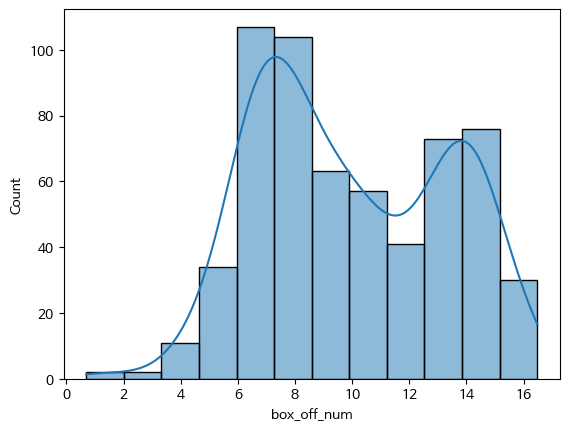

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['box_off_num'], kde=True)

**box_off_numÍ≥º ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ**

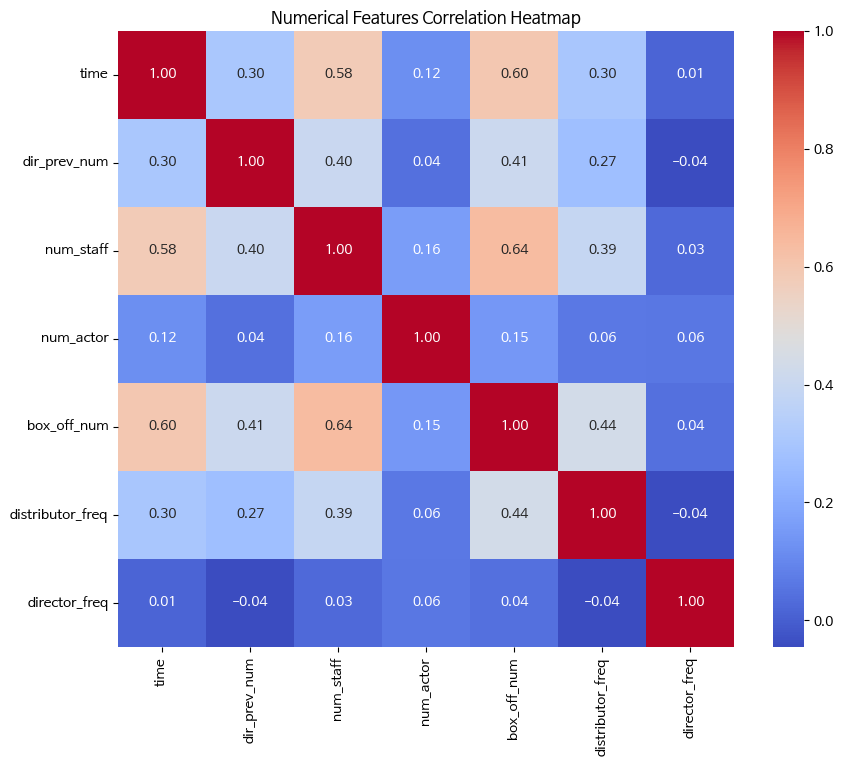

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = train.select_dtypes(include=['int64', 'float64'])
matrix = num_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Numerical Features Correlation Heatmap')
plt.show()

##4-1. GridSearchCVÎ•º Ïù¥Ïö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÏö©

‚úÖ 4. ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÏö© ÌîÑÎ°úÏÑ∏Ïä§
1. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÏúÑÌïú Í≤ÄÏ¶ù RMSE Í≥ÑÏÇ∞ ÏàòÌñâ  (GridSearchCV ÌôúÏö©)
- GridSearchCVÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å ÌöåÍ∑Ä Î™®Îç∏( Ridge, Lasso, ElasticNet, RandomForest, XGBoost, LightGBM, LinearRegression, GradientBoosting)Ïóê ÎåÄÌï¥ Í∞ÑÎã®Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâÏùÑ ÏàòÌñâ

- 8Í∞ú Î™®Îç∏Ïóê ÎåÄÌïú Í≤ÄÏ¶ù RMSEÎ•º ÌôïÏù∏ÌïòÏó¨ ÏÉÅÏúÑ 3-4Í∞úÏùò Î™®Îç∏(best_model)ÏùÑ ÌöçÎìù


2. ÏÉÅÏúÑ 3-4Í∞úÏùò Î™®Îç∏Ïóê ÎåÄÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
- Í∞Å Î™®Îç∏Ïóê ÎåÄÌïú Ï†ïÎ∞ÄÌôîÎêú ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ

3. ÌäúÎãùÎêú ÏÉÅÏúÑÎ≥¥Îç∏ÏùÑ Î∞îÌÉïÏúºÎ°ú Í∞ÄÏ§ëÏπò Í∏∞Î∞ò Î∏îÎ†åÎî© ÏàòÌñâ
- ÏÑ†ÌÉùÎêú Î™®Îç∏Îì§Ïùò ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï†ÄÏû•ÌïòÏó¨ ÌïôÏäµ Î∞è ÏòàÏ∏°

- ÏòàÏ∏°Îêú RMSEÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Ïù¥Ïóê ÎåÄÌïú Î∏îÎ†åÎî©ÏùÑ Ï§ÄÎπÑ

4. Í∞ÄÏ§ëÏπò Í∏∞Î∞ò Î∏îÎ†åÎî©
- Í∞Å Î™®Îç∏Ïùò RMSE Ïó≠ÏàòÎ•º ÌôúÏö©Ìï¥ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞

- RMSEÍ∞Ä ÎÇÆÏùÑÏàòÎ°ù ÎÜíÏùÄ Í∞ÄÏ§ëÏπò Î∂ÄÏó¨ÌïòÎèÑÎ°ù ÏÑ§Ï†ï

- ÏòàÏ∏°Í∞íÏùÑ Í∞ÄÏ§ë ÌèâÍ∑†ÌïòÏó¨ ÏµúÏ¢Ö y_pred Í∞íÏùÑ ÏÉùÏÑ±


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 1. X/y Î∂ÑÎ¶¨
X = train.drop('box_off_num', axis=1)
y = train['box_off_num']

# 2. train/test Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=156)

# 3. Î™®Îç∏Í≥º ÌååÎùºÎØ∏ÌÑ∞ Ï†ïÏùò
models = {
    "LinearRegression": (LinearRegression(), {}),
    "ElasticNet": (ElasticNet(), {"alpha": [0.1, 1.0, 10.0], "l1_ratio": [0.2, 0.5, 0.8]}),
    "Ridge": (Ridge(), {"alpha": [0.1, 10.0, 20.0]}),
    "Lasso": (Lasso(), {"alpha": [0.1, 10.0, 20.0]}),
    "RandomForest": (RandomForestRegressor(random_state=156), {"n_estimators": [100, 200], "max_depth": [3, 5]}),
    "GradientBoosting": (GradientBoostingRegressor(random_state=156), {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}),
    "XGBoost": (XGBRegressor(random_state=156, verbosity=0), {"n_estimators": [100, 200], "max_depth": [3, 5], "learning_rate": [0.05, 0.1]}),
   "LightGBM": (LGBMRegressor(random_state=156), {"n_estimators": [100, 200], "max_depth": [3, 5], "learning_rate": [0.05, 0.1]})
}


results = []

# 5. Î∞òÎ≥µ ÌïôÏäµ Î∞è ÏÑ±Îä• Ï†ÄÏû•
for name, (model, param_grid) in models.items():
    print(f"Training {name}...")

    if param_grid:
        grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        model.fit(X_train, y_train)
        best_model = model
        best_params = {}

    # Í≤ÄÏ¶ùÏÖã ÏòàÏ∏° Î∞è RMSE Í≥ÑÏÇ∞
    val_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, val_pred))
    print(f"{name} RMSE: {rmse:.4f}, Best Params: {best_params}")

    results.append({
        "Model": name,
        "RMSE": rmse,
        "BestParams": best_params
    })

# 6. Í≤∞Í≥º Ï†ïÎ¶¨
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\n--- ÏµúÏ¢Ö ÏÑ±Îä• ÎπÑÍµê ---")
print(results_df)

Training LinearRegression...
LinearRegression RMSE: 2.2439, Best Params: {}
Training ElasticNet...
ElasticNet RMSE: 2.2056, Best Params: {'alpha': 0.1, 'l1_ratio': 0.2}
Training Ridge...
Ridge RMSE: 2.1931, Best Params: {'alpha': 20.0}
Training Lasso...
Lasso RMSE: 2.2530, Best Params: {'alpha': 0.1}
Training RandomForest...
RandomForest RMSE: 1.8372, Best Params: {'max_depth': 5, 'n_estimators': 200}
Training GradientBoosting...
GradientBoosting RMSE: 1.8513, Best Params: {'learning_rate': 0.05, 'n_estimators': 200}
Training XGBoost...
XGBoost RMSE: 1.8292, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[L

ÏµúÏ¢Ö ÏÑ±Îä•

-          XGBoost : 1.829166   
-          LightGBM : 1.829999   
-      RandomForest : 1.837194   
-  GradientBoosting : 1.851270   
-             Ridge : 2.193144   
-        ElasticNet : 2.205594   
-  LinearRegression : 2.243920   
-             Lasso : 2.253033

üìå RMSE Í∏∞Ï§Ä ÏÑ±Îä• ÏÉÅÏúÑ 4Í∞úÏùò Î™®Îç∏ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùå: XGBoost / LightGBM / RandomForest / GradientBoosting

‚úÖ GridSearchCVÎ•º Ïù¥Ïö©ÌïòÏó¨ ÏÉÅÏúÑ 4Í∞úÏùò Î™®Îç∏Ïóê ÎåÄÌïú Ï†ïÎ∞Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÏßÑÌñâ

In [23]:
# XGBoost ÌäúÎãù
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=156)
xgb_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("XGBoost Best Params:", xgb_grid.best_params_)

XGBoost Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [24]:
# LightGBM ÌäúÎãù
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(random_state=156)
lgb_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.03, 0.05, 0.07],
    'num_leaves': [31, 50, 70]
}

lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
lgb_grid.fit(X_train, y_train)
print("LightGBM Best Params:", lgb_grid.best_params_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 35
[LightGBM] [Info] Start training from score 9.941734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [25]:
# RandomForest ÌäúÎãù
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=156)
rf_params = {
    'n_estimators': [180, 200, 220],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("RandomForest Best Params:", rf_grid.best_params_)

RandomForest Best Params: {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 220}


In [26]:
# Gradient Boosting ÌäúÎãù
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(random_state=156)
gbr_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

gbr_grid = GridSearchCV(gbr_model, gbr_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
gbr_grid.fit(X_train, y_train)
print("GradientBoosting Best Params:", gbr_grid.best_params_)

GradientBoosting Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


‚úÖ Î™®Îç∏ Î∏îÎ†åÎî© ÏàòÌñâ

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


# 1. Í∞Å Î™®Îç∏ÏùÑ best_estimator_Î°ú Ïû¨ÌïôÏäµ
xgb_best = XGBRegressor(**xgb_grid.best_params_, random_state=156)
lgb_best = LGBMRegressor(**lgb_grid.best_params_, random_state=156)
rf_best = RandomForestRegressor(**rf_grid.best_params_, random_state=156)
gbr_best = GradientBoostingRegressor(**gbr_grid.best_params_, random_state=156)

xgb_best.fit(X_train, y_train)
lgb_best.fit(X_train, y_train)
rf_best.fit(X_train, y_train)
gbr_best.fit(X_train, y_train)

# 2. ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏòàÏ∏°
pred_xgb = xgb_best.predict(X_test)
pred_lgb = lgb_best.predict(X_test)
pred_rf = rf_best.predict(X_test)
pred_gbr = gbr_best.predict(X_test)

# 3. ÏµúÏ†ÅÏùò RMSE Í≥ÑÏÇ∞
def rmse(i, pred):
    mse = mean_squared_error(i, pred)
    return np.sqrt(mse)

print("XGBoost RMSE:", rmse(y_test, pred_xgb))
print("LightGBM RMSE:", rmse(y_test, pred_lgb))
print("RandomForest RMSE:", rmse(y_test, pred_rf))
print("GradientBoosting RMSE:", rmse(y_test, pred_gbr))

# 4. Í∞ÄÏ§ëÏπò ÏÑ§Ï†ï
errors = np.array([
    rmse(y_test, pred_xgb),
    rmse(y_test, pred_lgb),
    rmse(y_test, pred_rf),
    rmse(y_test, pred_gbr)
])
inv_errors = 1 / errors
weights = inv_errors / np.sum(inv_errors)

print("Blending Weights:", weights)

# 5. test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (train Ï†ÑÏ≤¥Î°ú Îã§Ïãú ÌïôÏäµ)
X_test_pred = test[X.columns]

xgb_best.fit(X, y)
lgb_best.fit(X, y)
rf_best.fit(X, y)
gbr_best.fit(X, y)

pred_test = (
    weights[0] * xgb_best.predict(X_test_pred) +
    weights[1] * lgb_best.predict(X_test_pred) +
    weights[2] * rf_best.predict(X_test_pred) +
    weights[3] * gbr_best.predict(X_test_pred)
)

# 6. ÏòàÏ∏° Í≤∞Í≥º Ïó≠Î°úÍ∑∏
pred_test_final = np.expm1(pred_test)

# 7. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission['box_off_num'] = pred_test_final
submission.to_csv('final_blended_submission_4.csv', index=False)
print("‚úÖ ÏÉÅÏúÑ 4Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 35
[LightGBM] [Info] Start training from score 9.941734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

‚úÖ ÏµúÏ¢Ö Î™®Îç∏ Ï†ÅÏö© Î∞è Î¶¨ÎçîÎ≥¥Îìú Í≤∞Í≥º

Ï†ÅÏö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ (Ï¥ù 4Ï¢Ö): RandomForest, LightGBM, XGBoost, GradientBoosting

Î∏îÎ†åÎî©ÏùÑ ÌÜµÌï¥ ÏÉùÏÑ±Îêú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Ï†úÏ∂úÌïú Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò: 1444098.52

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Í∞Å Î™®Îç∏ÏùÑ best_estimator_Î°ú Ïû¨ÌïôÏäµ
xgb_best = XGBRegressor(**xgb_grid.best_params_, random_state=156)
lgb_best = LGBMRegressor(**lgb_grid.best_params_, random_state=156)
rf_best = RandomForestRegressor(**rf_grid.best_params_, random_state=156)

xgb_best.fit(X_train, y_train)
lgb_best.fit(X_train, y_train)
rf_best.fit(X_train, y_train)

# 2. ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏòàÏ∏°
pred_xgb = xgb_best.predict(X_test)
pred_lgb = lgb_best.predict(X_test)
pred_rf = rf_best.predict(X_test)

# 3. ÏµúÏ†ÅÏùò RMSE Í≥ÑÏÇ∞ Ìï®Ïàò
def rmse(i, pred):
    mse = mean_squared_error(i, pred)
    return np.sqrt(mse)

print("XGBoost RMSE:", rmse(y_test, pred_xgb))
print("LightGBM RMSE:", rmse(y_test, pred_lgb))
print("RandomForest RMSE:", rmse(y_test, pred_rf))

# 4. Í∞ÄÏ§ëÏπò ÏÑ§Ï†ï
errors = np.array([
    rmse(y_test, pred_xgb),
    rmse(y_test, pred_lgb),
    rmse(y_test, pred_rf)
])
inv_errors = 1 / errors
weights = inv_errors / np.sum(inv_errors)

print("Blending Weights:", weights)

# 5. test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (train Ï†ÑÏ≤¥Î°ú Îã§Ïãú ÌïôÏäµ)
X_test_pred = test[X.columns]

xgb_best.fit(X, y)
lgb_best.fit(X, y)
rf_best.fit(X, y)

pred_test = (
    weights[0] * xgb_best.predict(X_test_pred) +
    weights[1] * lgb_best.predict(X_test_pred) +
    weights[2] * rf_best.predict(X_test_pred)
)

# 6. ÏòàÏ∏° Í≤∞Í≥º Ïó≠Î°úÍ∑∏ Î≥ÄÌôò
pred_test_final = np.expm1(pred_test)

# 7. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission['box_off_num'] = pred_test_final
submission.to_csv('final_blended_submission_3.csv', index=False)
print("‚úÖ ÏÉÅÏúÑ 3Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 35
[LightGBM] [Info] Start training from score 9.941734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

‚úÖ ÏµúÏ¢Ö Î™®Îç∏ Ï†ÅÏö© Î∞è Î¶¨ÎçîÎ≥¥Îìú Í≤∞Í≥º

Ï†ÅÏö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ (Ï¥ù 3Ï¢Ö): RandomForest, LightGBM, XGBoost

Î∏îÎ†åÎî©ÏùÑ ÌÜµÌï¥ ÏÉùÏÑ±Îêú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Ï†úÏ∂úÌïú Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò:1452326.55

##4-2. HyperoptÎ•º Ïù¥Ïö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÏö©
‚úÖ 4. ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÏö© ÌîÑÎ°úÏÑ∏Ïä§
1. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù (Hyperopt ÌôúÏö©)
- HyperoptÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å ÌöåÍ∑Ä Î™®Îç∏(Ïòà: Ridge, Lasso, ElasticNet, RandomForest, XGBoost, LightGBM Îì±)Ïóê ÎåÄÌï¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

- ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞Î•º Í∞ÄÏßÑ Î™®Îç∏(best_model)ÏùÑ ÌöçÎìùÌï©ÎãàÎã§.

2. Î™®Îç∏ ÌïôÏäµ Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
- Í∞Å Î™®Îç∏ÏùÑ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú ÌïôÏäµ(fit)ÏãúÌÇµÎãàÎã§.

- Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú RMSEÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï©ÎãàÎã§.

3. ÏÉÅÏúÑ Î™®Îç∏ ÏÑ†Ï†ï
- RMSE Í∏∞Ï§ÄÏúºÎ°ú ÏÑ±Îä•Ïù¥ Ïö∞ÏàòÌïú ÏÉÅÏúÑ 3~4Í∞ú Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.

- ÏÑ†ÌÉùÎêú Î™®Îç∏Îì§Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Î∏îÎ†åÎî©ÏùÑ ÏàòÌñâÌï† Ï§ÄÎπÑÎ•º Ìï©ÎãàÎã§.

4. Í∞ÄÏ§ëÏπò Í∏∞Î∞ò Î∏îÎ†åÎî©
- Í∞Å Î™®Îç∏Ïùò RMSE Ïó≠ÏàòÎ•º ÌôúÏö©Ìï¥ Í∞ÄÏ§ëÏπòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

- RMSEÍ∞Ä ÎÇÆÏùÑÏàòÎ°ù ÎÜíÏùÄ Í∞ÄÏ§ëÏπò Î∂ÄÏó¨

- ÏòàÏ∏°Í∞íÏùÑ Í∞ÄÏ§ë ÌèâÍ∑†ÌïòÏó¨ ÏµúÏ¢Ö y_pred Í∞íÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# X, y Î∂ÑÎ¶¨
X = train.drop(columns='box_off_num')
y = train['box_off_num']
X_test= test[X.columns]

In [30]:
from sklearn.model_selection import train_test_split

# X, yÎäî Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞
X_tra, X_val, y_tra, y_val = train_test_split(X, y, test_size=0.2, random_state=156)

In [31]:
# Ridge ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import numpy as np

# 1. ÌÉêÏÉâÌï† alpha Î≤îÏúÑ Ï†ïÏùò
ridge_search_space = {
    'alpha': hp.quniform('alpha', 0.001, 20.0, 0.005)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_ri(search_space):
    ridge = Ridge(alpha=search_space['alpha'], random_state=156)
    mse = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=3)
    return {
        'loss': -1 * np.mean(mse),
        'status': STATUS_OK
    }

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_ri = fmin(
    fn=objective_func_ri,
    space=ridge_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å alphaÎ•º ÏÇ¨Ïö©Ìïú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_ridge = Ridge(alpha=best_ri['alpha'], random_state=156)
best_ridge.fit(X_tra, y_tra)
ridge_pred = best_ridge.predict(X_val)

# 5. ÌèâÍ∞Ä Ìï®Ïàò Ìò∏Ï∂ú
print('Ridge Í≤∞Í≥º')
ridge_rmse=np.sqrt(mean_squared_error(y_val, ridge_pred))
print(ridge_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:04<00:00, 10.85trial/s, best loss: 4.515379857997483]
Ridge Í≤∞Í≥º
2.1979228996544773


In [32]:
# Lasso ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
import numpy as np

# 1. ÌÉêÏÉâÌï† alpha Î≤îÏúÑ Ï†ïÏùò
lasso_search_space = {
    'alpha': hp.quniform('alpha', 0.01, 20.0, 0.005)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_la(search_space):
    lasso = Lasso(alpha=search_space['alpha'], random_state=156)
    mse = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=3)
    return {
        'loss': -1 * np.mean(mse),
        'status': STATUS_OK
    }

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_la = fmin(
    fn=objective_func_la,
    space=lasso_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å alphaÎ•º ÏÇ¨Ïö©Ìïú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_lasso = Lasso(alpha=best_la['alpha'], random_state=156)
best_lasso.fit(X_tra, y_tra)
lasso_pred = best_lasso.predict(X_val)

# 5. ÌèâÍ∞Ä Ìï®Ïàò Ìò∏Ï∂ú
print('Lasso Í≤∞Í≥º')
lasso_rmse=np.sqrt(mean_squared_error(y_val, lasso_pred))
print(lasso_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:01<00:00, 33.19trial/s, best loss: 4.523938328149264]
Lasso Í≤∞Í≥º
2.1932067673192903


In [33]:
# ElasticNet ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
import numpy as np

# 1. ÌÉêÏÉâÌï† alpha, l1_ratio Î≤îÏúÑ Ï†ïÏùò
elastic_search_space = {
    'alpha': hp.quniform('alpha', 0.1, 20.0, 0.05),
    'l1_ratio': hp.quniform('l1_ratio', 0.001, 1.0, 0.005)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_el(search_space):
    elastic = ElasticNet(alpha=search_space['alpha'],
                         l1_ratio=search_space['l1_ratio'],
                         random_state=156)
    mse = cross_val_score(elastic, X, y, scoring='neg_mean_squared_error', cv=3)
    return {
        'loss': -1 * np.mean(mse),
        'status': STATUS_OK
    }

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_el = fmin(
    fn=objective_func_el,
    space=elastic_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_elastic = ElasticNet(alpha=best_el['alpha'],
                          l1_ratio=best_el['l1_ratio'],
                          random_state=156)
best_elastic.fit(X_tra, y_tra)
elastic_pred = best_elastic.predict(X_val)

# 5. ÌèâÍ∞Ä
print('ElasticNet Í≤∞Í≥º')
elastic_rmse=np.sqrt(mean_squared_error(y_val, elastic_pred))
print(elastic_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:01<00:00, 30.99trial/s, best loss: 4.854527715236849]
ElasticNet Í≤∞Í≥º
2.2655304667779625


In [34]:
# Random Forest ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 1. ÌÉêÏÉâÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞Ñ Ï†ïÏùò
rf_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 250, 50),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_rf(space):
    rf_clf = RandomForestRegressor(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        min_samples_split=int(space['min_samples_split']),
        random_state=156
    )
    mse = cross_val_score(rf_clf, X_tra, y_tra, cv=3, scoring="neg_mean_squared_error")
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_rf = fmin(
    fn=objective_rf,
    space=rf_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ
best_rf_reg = RandomForestRegressor(
    n_estimators=int(best_rf['n_estimators']),
    max_depth=int(best_rf['max_depth']),
    min_samples_split=int(best_rf['min_samples_split']),
    random_state=156
)
best_rf_reg.fit(X_tra, y_tra)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
rf_pred = best_rf_reg.predict(X_val)
print('Random Forest Í≤∞Í≥º')
rf_rmse=np.sqrt(mean_squared_error(y_val, rf_pred))
print(rf_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [01:36<00:00,  1.93s/trial, best loss: 3.7547447976140664]
Random Forest Í≤∞Í≥º
1.8216130744296017


In [35]:
# XGBoost ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import numpy as np

# 1. ÌÉêÏÉâÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞Ñ Ï†ïÏùò
xgb_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 250, 50),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_xgb(search_space):
    xgb_clf = XGBRegressor(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        learning_rate=search_space['learning_rate'],
        eval_metric='rmse',
        random_state=156
    )
    mse = cross_val_score(xgb_clf, X_tra, y_tra, scoring='neg_mean_squared_error', cv=3)
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_xgb = fmin(
    fn=objective_func_xgb,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_xgb_reg = XGBRegressor(
    n_estimators=int(best_xgb['n_estimators']),
    max_depth=int(best_xgb['max_depth']),
    learning_rate=best_xgb['learning_rate'],
    random_state=156
)
best_xgb_reg.fit(X_tra, y_tra)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
xgb_pred = best_xgb_reg.predict(X_val)
print('XGBoost Í≤∞Í≥º')
xgb_rmse=np.sqrt(mean_squared_error(y_val, xgb_pred))
print(xgb_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [01:04<00:00,  1.30s/trial, best loss: 3.938207433168681]
XGBoost Í≤∞Í≥º
1.9064004806667945


In [36]:
# LightGBM ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
import numpy as np

# 1. ÌÉêÏÉâÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞Ñ Ï†ïÏùò
lgbm_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 250, 50),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'subsample': hp.uniform('subsample', 0.7, 1.0)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_lgbm(search_space):
    lgbm_clf = LGBMRegressor(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        learning_rate=search_space['learning_rate'],
        subsample=search_space['subsample'],
        eval_metric='rmse',
        verbose=-1,
        random_state=156
    )
    mse = cross_val_score(lgbm_clf, X_tra, y_tra, scoring='neg_mean_squared_error', cv=3)
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_lgbm = fmin(
    fn=objective_func_lgbm,
    space=lgbm_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_lgbm_reg = LGBMRegressor(
    n_estimators=int(best_lgbm['n_estimators']),
    max_depth=int(best_lgbm['max_depth']),
    learning_rate=best_lgbm['learning_rate'],
    subsample=best_lgbm['subsample'],
    random_state=156
)
best_lgbm_reg.fit(X_tra, y_tra)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
lgbm_pred = best_lgbm_reg.predict(X_val)
print('LightGBM Í≤∞Í≥º')
lgbm_rmse=np.sqrt(mean_squared_error(y_val, lgbm_pred))
print(lgbm_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:07<00:00,  6.49trial/s, best loss: 3.9894011411824564]
LightGBM Í≤∞Í≥º
1.8408233610400904


In [37]:
# Gradient Boosting ÌöåÍ∑Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è Î™®Îç∏ ÌïôÏäµ/ÌèâÍ∞Ä
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ Í≥µÍ∞Ñ Ï†ïÏùò
gbrt_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 50),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'subsample': hp.uniform('subsample', 0.7, 1.0)
}

# 2. Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò
def objective_func_gbrt(search_space):
    gbrt = GradientBoostingRegressor(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        learning_rate=search_space['learning_rate'],
        subsample=search_space['subsample'],
        random_state=156
    )
    mse = cross_val_score(gbrt, X_tra, y_tra, scoring='neg_mean_squared_error', cv=3)
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Ïã§Ìñâ
trial_val = Trials()
best_gbrt = fmin(
    fn=objective_func_gbrt,
    space=gbrt_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
best_gbrt_reg = GradientBoostingRegressor(
    n_estimators=int(best_gbrt['n_estimators']),
    max_depth=int(best_gbrt['max_depth']),
    learning_rate=best_gbrt['learning_rate'],
    subsample=best_gbrt['subsample'],
    random_state=156
)
best_gbrt_reg.fit(X_tra, y_tra)

# 5. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
gbrt_pred = best_gbrt_reg.predict(X_val)
print('Gradient Boosting Í≤∞Í≥º')
gbrt_rmse=np.sqrt(mean_squared_error(y_val, gbrt_pred))
print(gbrt_rmse)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [01:09<00:00,  1.40s/trial, best loss: 3.7291194583620126]
Gradient Boosting Í≤∞Í≥º
1.8104908232436179


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Î™®Îç∏ ÌïôÏäµ
lr = LinearRegression()
lr.fit(X_tra, y_tra)

# ÏòàÏ∏°
lr_pred = lr.predict(X_val)

# RMSE Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
lr_rmse = round(np.sqrt(mean_squared_error(y_val, lr_pred)), 3)
print(lr_rmse)

2.244


In [39]:
pd.DataFrame({'model':['LR','Lasso','Ridge','ElasticNet','GradientBoosting','RF','XGB','LGBM'],
              'rmse':[lr_rmse, lasso_rmse, ridge_rmse, elastic_rmse, gbrt_rmse, rf_rmse, xgb_rmse, lgbm_rmse]})

model      rmse
0                LR  2.244000
1             Lasso  2.193207
2             Ridge  2.197923
3        ElasticNet  2.265530
4  GradientBoosting  1.810491
5                RF  1.821613
6               XGB  1.906400
7              LGBM  1.840823

üìå RMSE Í∏∞Ï§Ä ÏÑ±Îä• ÏÉÅÏúÑ 4Í∞ú Î™®Îç∏ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§:
RandomForest, LightGBM, XGBoost, GradientBoosting

Ïù¥Îì§ Î™®Îç∏ÏùÄ RMSE Í∞íÏù¥ Í∞ÄÏû• ÎÇÆÏïÑ, ÏµúÏ¢Ö Î∏îÎ†åÎî© ÎåÄÏÉÅ Î™®Îç∏Î°ú ÏÑ†Ï†ïÎêòÏóàÏäµÎãàÎã§.

In [40]:
# 1. Î™®Îç∏Î≥Ñ RMSE (Ïòà: ÌäúÎãù ÌõÑ ÏñªÏùÄ Í∞íÎì§)
rmses = {
    'GradientBoosting': gbrt_rmse,
    'RF': rf_rmse,
    'LightGBM': lgbm_rmse,
    'XGBoost': xgb_rmse
}

# 2.
gbrt_pred_2= best_gbrt_reg.predict(X_test)
rf_pred_2= best_rf_reg.predict(X_test)
lgbm_pred_2= best_lgbm_reg.predict(X_test)
xgb_pred_2= best_xgb_reg.predict(X_test)
test_preds = {
     'GradientBoosting': gbrt_pred_2,
     'RF': rf_pred_2,
     'LightGBM': lgbm_pred_2,
     'XGBoost': xgb_pred_2
 }

# 3. Î™®Îç∏ Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏
top_model_names = list(rmses.keys())

# 4. RMSE Ïó≠Ïàò Í∏∞Î∞ò Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
inv_rmses = {k: 1/v for k, v in rmses.items()}
total = sum(inv_rmses.values())
weights = {k: v/total for k, v in inv_rmses.items()}

# 5. Î∏îÎ†åÎî© ÏòàÏ∏° Ï¥àÍ∏∞Ìôî Î∞è Í∞ÄÏ§ë ÌèâÍ∑† Í≥ÑÏÇ∞
blended_pred = np.zeros_like(test_preds[top_model_names[0]], dtype=float)

for name in top_model_names:
    blended_pred += test_preds[name] * weights[name]

# 6. Î°úÍ∑∏ Î≥ÄÌôò Ìï¥Ï†ú (ÏòàÏ∏°Ïù¥ logÎ°ú ÎêòÏñ¥ ÏûàÏóàÎã§Î©¥)
final_pred = np.expm1(blended_pred)  # log1p ÏçºÎã§Î©¥
final_pred = np.maximum(0, final_pred)  # ÏùåÏàò Ï†úÍ±∞
final_pred = np.nan_to_num(final_pred)  # NaN Ï†úÍ±∞

# 7. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission['box_off_num'] = final_pred
print("‚úÖ ÏÉÅÏúÑ 4Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å")

‚úÖ ÏÉÅÏúÑ 4Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å


In [41]:
submission.to_csv('submission.csv', index=False)

‚úÖ ÏµúÏ¢Ö Î™®Îç∏ Ï†ÅÏö© Î∞è Î¶¨ÎçîÎ≥¥Îìú Í≤∞Í≥º

Ï†ÅÏö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ (Ï¥ù 4Ï¢Ö):
RandomForest, LightGBM, XGBoost, GradientBoosting

Î∏îÎ†åÎî©ÏùÑ ÌÜµÌï¥ ÏÉùÏÑ±Îêú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Ï†úÏ∂úÌïú Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò:
1,413,668.67



In [43]:
# 1. Î™®Îç∏Î≥Ñ RMSE (Ïòà: ÌäúÎãù ÌõÑ ÏñªÏùÄ Í∞íÎì§)
rmses = {
    'RF': rf_rmse,
    'LightGBM': lgbm_rmse,
    'XGBoost': xgb_rmse
}

# 2.
rf_pred_2= best_rf_reg.predict(X_test)
lgbm_pred_2= best_lgbm_reg.predict(X_test)
xgb_pred_2= best_xgb_reg.predict(X_test)
test_preds = {
     'RF': rf_pred_2,
     'LightGBM': lgbm_pred_2,
     'XGBoost': xgb_pred_2
 }

# 3. Î™®Îç∏ Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏
top_model_names = list(rmses.keys())

# 4. RMSE Ïó≠Ïàò Í∏∞Î∞ò Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
inv_rmses = {k: 1/v for k, v in rmses.items()}
total = sum(inv_rmses.values())
weights = {k: v/total for k, v in inv_rmses.items()}

# 5. Î∏îÎ†åÎî© ÏòàÏ∏° Ï¥àÍ∏∞Ìôî Î∞è Í∞ÄÏ§ë ÌèâÍ∑† Í≥ÑÏÇ∞
blended_pred = np.zeros_like(test_preds[top_model_names[0]], dtype=float)

for name in top_model_names:
    blended_pred += test_preds[name] * weights[name]

# 6. Î°úÍ∑∏ Î≥ÄÌôò Ìï¥Ï†ú (ÏòàÏ∏°Ïù¥ logÎ°ú ÎêòÏñ¥ ÏûàÏóàÎã§Î©¥)
final_pred = np.expm1(blended_pred)  # log1p ÏçºÎã§Î©¥
final_pred = np.maximum(0, final_pred)  # ÏùåÏàò Ï†úÍ±∞
final_pred = np.nan_to_num(final_pred)  # NaN Ï†úÍ±∞

# 7. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission_blended=submission.copy()
submission_blended['box_off_num'] = final_pred
print("‚úÖ ÏÉÅÏúÑ 3Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å")

‚úÖ ÏÉÅÏúÑ 3Í∞ú Î™®Îç∏ Î∏îÎ†åÎî© ÏòàÏ∏° ÏôÑÎ£å


In [44]:
submission.to_csv('submission_blended.csv', index=False)

‚úÖ ÏµúÏ¢Ö Î™®Îç∏ Ï†ÅÏö© Î∞è Î¶¨ÎçîÎ≥¥Îìú Í≤∞Í≥º

Ï†ÅÏö©Ìïú ÌöåÍ∑Ä Î™®Îç∏ (Ï¥ù 3Ï¢Ö):
RandomForest, LightGBM, XGBoost

Î∏îÎ†åÎî©ÏùÑ ÌÜµÌï¥ ÏÉùÏÑ±Îêú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Ï†úÏ∂úÌïú Î¶¨ÎçîÎ≥¥Îìú Ï†êÏàò:
1410308.82

